<a href="https://colab.research.google.com/github/preetmodi/Credit-Risk-Analytics/blob/main/XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=eUfo8sqDCGeA5fBW0bzpc%2F3dFuke4-oIkRa-gyY-dUY'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Cannot retrieve auth tokens.
Failure("Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fww

In [ ]:
!pip install git+https://github.com/CBravoR/scorecardpy

%cd /content/gdrive/My Drive/Data/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/CBravoR/scorecardpy to /tmp/pip-req-build-jqt8e9l_
  Running command git clone --filter=blob:none --quiet https://github.com/CBravoR/scorecardpy /tmp/pip-req-build-jqt8e9l_
  Resolved https://github.com/CBravoR/scorecardpy to commit 03ec28470391e5c950580ad9ac4877ca33f05fce
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.3-py3-none-any.whl size=59549 sha256=114dfc8da030dc5643b9d71acdce16ed572d4f6c1f535e6af9d981abf5ad89a1
  Stored in directory: /tmp/pip-ephem-wheel-cache-v5r39ogh/wheels/61/36/7f/76fa329f36d896910f2251f5cfd54094c722e088b633e47f6f
Successfully built scorecardpy
/content/gdrive/My Drive/Data


In [ ]:
# Package loading
import pandas as pd
import numpy as np
import scorecardpy as sc
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from xgboost import XGBClassifier 

%matplotlib inline
seed = 251256517

In [ ]:
# Import the files as Pandas datasets
train_WoE = pd.read_pickle('model/data/train_woe_corr.pkl')
test_WoE = pd.read_pickle('model/data/test_woe_corr.pkl')

train_noWoE = pd.read_pickle('model/data/train_no_woe.pkl')
test_noWoE = pd.read_pickle('model/data/test_no_woe.pkl')

# Give breaks for WoE
# with open('breaks_adj.json', 'r') as f:
#     breaks_adj = json.load(f)
# breaks_adj = {'Address': [1.0,2.0,8.0,17.0],
#               'Age': [30.0,45.0,50.0],
#               'Creddebt': [1.0, 6.0],
#               'Employ': [4.0,14.0,22.0],
#               'Income': [30.0,40.0,80.0,140.0],
#               'Leverage': [8.0,16.0,22.0],
#               'MonthlyLoad': [0.1,0.2,0.30000000000000004,0.7000000000000001],
#               'OthDebt': [1.0,2.0,3.0],
#               'OthDebtRatio': [0.01,0.05,0.07,0.09,0.14]
#               }

# Apply breaks.
# bins_adj = sc.woebin(train_noWoE, y="Default",
#                      breaks_list=breaks_adj)
  

In [ ]:
#Define the classifier.
XGB_lendingclub = XGBClassifier(max_depth=2,                 # Depth of each tree
                            learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=50,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=-1,                    # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights. G / B
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=seed,        # Seed
                            tree_method='hist',           # How to train the trees?
#                             gpu_id=0                     # With which GPU? 
                            )

## Change these

In [ ]:
param_grid = dict({'n_estimators': [900, 1000, 2000, 5000],
                   'max_depth': [3,4,5],
                 'learning_rate' : [0.05, 0.08, 0.1, 0.15]
                  })

In [ ]:
categorical_features = list(set(train_noWoE.columns) - set(train_noWoE.describe().columns))
categorical_features.remove('id')
# train_noWoE = train_noWoE.drop(['earliest_cr_line'], axis = 1)

In [ ]:
# Always a good idea to tune on a reduce sample of the train set, as we will call many functions.
val_train = train_noWoE.sample(frac = 0.5,               # The fraction to extract
                                       random_state = seed,    # The seed.
                                       )

## Run Grid Search


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define grid search object.
GridXGB = GridSearchCV(XGB_lendingclub,        # Original XGB. 
                       param_grid,          # Parameter grid
                       cv = 3,              # Number of cross-validation folds.  
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = -1,          # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

# Follow the same approach for all categorical Variables

In [ ]:
categorical_features

['application_type', 'purpose', 'term', 'home_ownership']

In [ ]:

categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[("cat", categorical_transformer, categorical_features)],
    remainder='passthrough'
)

# Now we define a Pipeline to process everything
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", GridXGB)]
)

# Train the XGB.
clf.fit(val_train.drop(columns='Default'), # X 
        val_train['Default']    # y
        )

Fitting 3 folds for each of 48 candidates, totalling 144 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['term', 'application_type',
                                                   'purpose',
                                                   'home_ownership'])])),
                ('classifier',
                 GridSearchCV(cv=3,
                              estimator=XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      callbacks=None,
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytre...
                                            

In [ ]:
# Show best params
print(f'The best AUC is {GridXGB.best_score_:.3f}')
GridXGB.best_params_

The best AUC is 0.738


{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 2000}

# Train model on entire training dataset

In [ ]:
categorical_features

In [ ]:
# Create XGB with best parameters.
XGB_lendingclub = XGBClassifier(max_depth=4, # Depth of each tree
                            learning_rate=0.05, # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=2000, # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=-1,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=seed,        # Seed
                            tree_method='gpu_hist',       # How to train the trees?
                            gpu_id=0                      # With which GPU?
                            )

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,home_ownership,purpose,dti,delinq_2yrs,fico_range_low,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,bank_dlq,il_acc,payment_history,collateral_coverage_ratio
0,24700.0,24700.0,24700.0,36 months,820.28,MORTGAGE,small_business,16.06,1.0,715.0,...,0.0,0.0,314017.0,39475.0,79300.0,24667.0,0,1,0.631895,0.998664
1,20000.0,20000.0,20000.0,60 months,432.66,MORTGAGE,home_improvement,10.78,0.0,695.0,...,0.0,0.0,218418.0,18696.0,6200.0,14877.0,0,1,0.888889,0.743850
5,1400.0,1400.0,1400.0,36 months,47.10,MORTGAGE,other,34.95,0.0,700.0,...,0.0,0.0,372109.0,75258.0,34500.0,55501.0,0,1,0.666667,39.643571
6,18000.0,18000.0,18000.0,60 months,471.70,RENT,debt_consolidation,9.39,0.0,665.0,...,1.0,0.0,65819.0,36247.0,10300.0,31319.0,0,1,0.740741,1.739944
8,16000.0,16000.0,16000.0,60 months,379.39,MORTGAGE,credit_card,33.18,0.0,685.0,...,0.0,2.0,298100.0,31329.0,200000.0,13400.0,1,1,0.367947,0.837500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280640,32000.0,32000.0,32000.0,60 months,752.74,MORTGAGE,home_improvement,10.34,0.0,735.0,...,0.0,0.0,524379.0,122872.0,15800.0,23879.0,0,1,0.611111,0.746219
1280641,24000.0,24000.0,24000.0,60 months,515.74,OWN,credit_card,10.98,0.0,725.0,...,0.0,2.0,128902.0,31320.0,93700.0,28602.0,0,1,0.500000,1.191750
1280643,24000.0,24000.0,24000.0,60 months,515.74,MORTGAGE,debt_consolidation,34.94,0.0,695.0,...,0.0,1.0,227883.0,140118.0,27900.0,172283.0,1,1,0.431414,7.178458
1280644,24000.0,24000.0,24000.0,60 months,564.56,RENT,debt_consolidation,18.30,0.0,660.0,...,1.0,0.0,84664.0,62426.0,20700.0,58764.0,0,1,0.768452,2.448500


In [ ]:
# Train over all training data.

categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[("cat", categorical_transformer, categorical_features)],
    remainder='passthrough'
)

# Now we define a Pipeline to process everything
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", XGB_lendingclub)]
)

# Train the XGB.
clf.fit(train_noWoE.drop(columns=['Default', 'id']), # X 
                  train_noWoE['Default']    # y
                  )

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['application_type',
                                                   'purpose', 'term',
                                                   'home_ownership'])])),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=No...
                               feature_types=None, gamma=0.001, gpu_id=0,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.05,
                               max_bin=256, max_cat

In [ ]:
import pickle
# with open('model/xgboost.pkl', 'wb') as fp:
#     pickle.dump(XGB_lendingclub, fp)
XGB_lendingclub.save_model('model/xgboost.json')


In [ ]:
with open('model/XGB_pipe.pkl', 'wb') as fp:
    pickle.dump(clf, fp)

In [ ]:
with open('model/XGB_pipe.pkl', 'rb') as fp:
    clf = pickle.load(fp)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['application_type',
                                                   'purpose', 'term',
                                                   'home_ownership'])])),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=No...
                               feature_types=None, gamma=0.001, gpu_id=0,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.05,
                               max_bin=256, max_cat

# Variable Importance

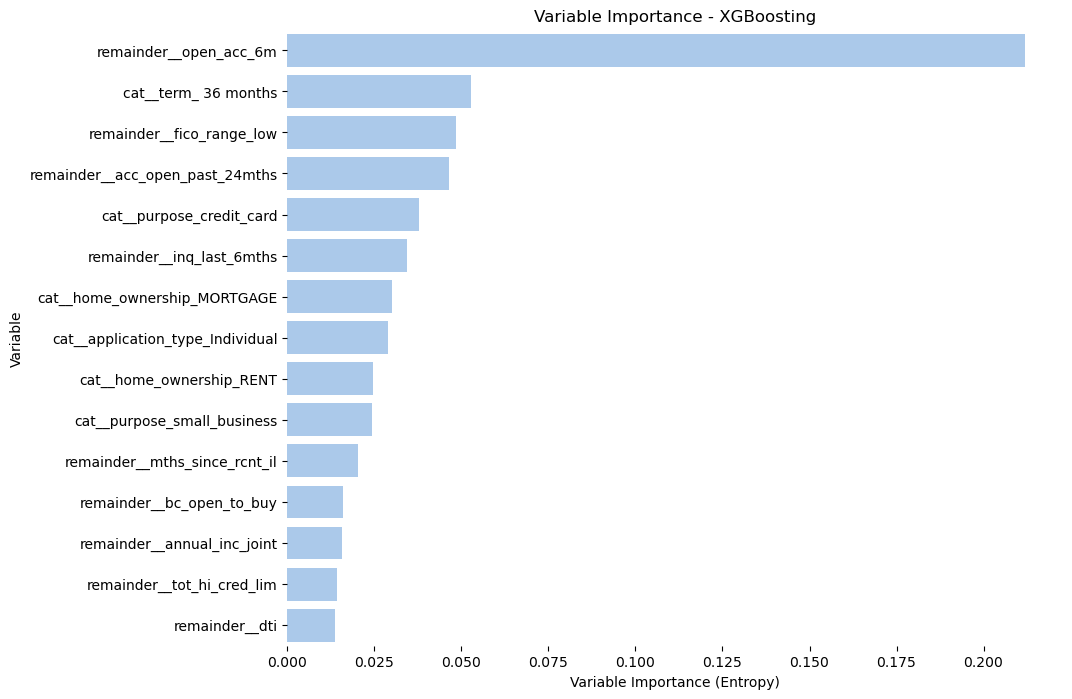

In [ ]:
# Plot variable importance
importances = XGB_lendingclub.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(10, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[clf[:-1].get_feature_names_out()[i] for i in indices][:15], x=importances[indices][:15], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)
plt.savefig('./../images/variable_importance.png', dpi = 300)

### Confusion Matrix

In [ ]:
test_noWoE = test_noWoE.drop(['earliest_cr_line','id'], axis=1)

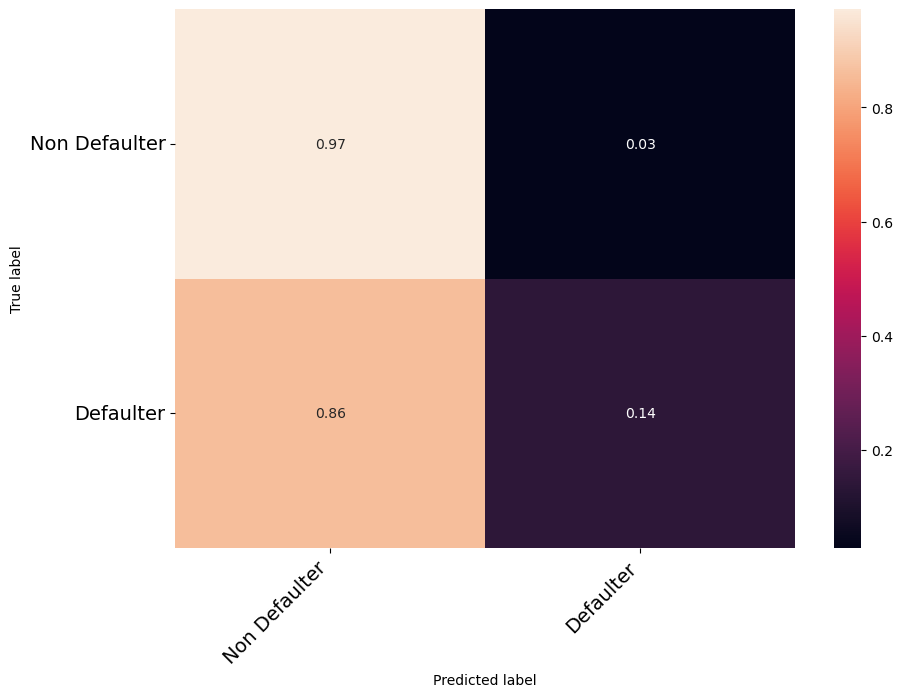

In [ ]:
# Calculate probability
XGBClassTest = clf.predict(test_noWoE.drop(columns="Default"))
xg_probs_test = clf.predict_proba(test_noWoE.drop(columns="Default"))
xg_probs_test = xg_probs_test[:, 1]

# Calculate confusion matrix
confusion_matrix_xgb = confusion_matrix(y_true = test_noWoE['Default'], 
                    y_pred = XGBClassTest)

# Turn matrix to percentages
confusion_matrix_xgb_pc = confusion_matrix_xgb.astype('float') / confusion_matrix_xgb.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_xgb_pc, index=['Non Defaulter', 'Defaulter'], columns=['Non Defaulter', 'Defaulter'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

In [ ]:
confusion_matrix_xgb

array([[295151,   8454],
       [ 69293,  11287]], dtype=int64)

In [ ]:
recall = 11287/(69293+11287)
precision = 11287/(11287+8454)
f1 = 2*precision*recall/(precision+recall)
recall, precision, f1

(0.14007197815835196, 0.5717542171115951, 0.22501769320481257)

In [ ]:
recall = confusion_matrix_xgb[0,0]/confusion_matrix_xgb[0].sum()
precision = confusion_matrix_xgb[0,0]/confusion_matrix_xgb[:,0].sum()

f1 = 2*precision*recall/(precision+recall)
recall, precision, f1

(0.9721546087844403, 0.8098665364226054, 0.8836208122458082)

## ROC AUC

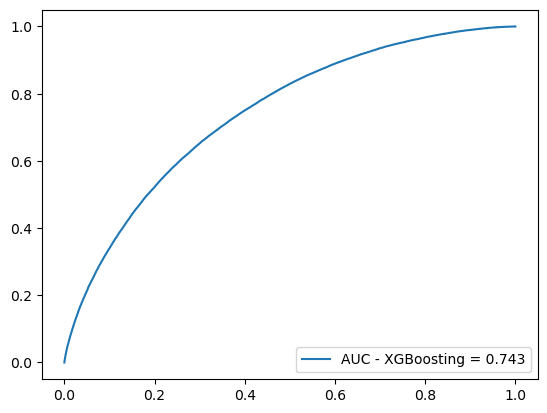

In [ ]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(test_noWoE['Default'], 
                                 xg_probs_test)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = test_noWoE['Default'], 
                             y_score = xg_probs_test),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC - XGBoosting = " + str(auc))
plt.legend(loc=4)
plt.show()

## Bootstapping to calculate error rates

In [ ]:
# Write a Bootstrap function that calculates the different AUCs
def BootstrapPredErr(pred_prob, y_true, num_samples=1000):
    n = len(pred_prob)
    full_data = pd.DataFrame({'y_score':pred_prob, 'y_true':y_true})
    err = np.zeros(num_samples)    
    for i in range(num_samples):
        d = full_data.sample(n, replace=True)
        err[i] = np.round(roc_auc_score(y_true=d['y_true'], 
                             y_score=d['y_score']),
                             decimals=3
                          )
    return err

In [ ]:
# Apply bootstrapping
auc_boot = BootstrapPredErr(pred_prob=xg_probs_test,  
                            y_true=test_noWoE['Default'])
upper=np.quantile(auc-auc_boot, 0.975, axis=0)
lower=np.quantile(auc-auc_boot, 0.025, axis=0)

# Compute confidence interval
boot_ci = [auc - upper, 
           auc - lower]
print(f"AUC Confidence Interval: [{boot_ci[0]:.3f}, {boot_ci[1]:.3f}]")

AUC Confidence Interval: [0.741, 0.744]


#Shap Values

In [ ]:
# !pip install shap

In [ ]:
import shap
shap.initjs() # Import Java engine.

In [ ]:
# Create transformed data from previous preprocessor
data = pd.DataFrame(preprocessor.fit_transform(test_noWoE.drop(["Default"], axis=1)))
data.columns = preprocessor.get_feature_names_out()

In [ ]:
# Trains the game-theoretic model. Really complex so requires sampling.
explainer = shap.TreeExplainer(XGB_lendingclub,                 # The model    
                              data = shap.sample(data, 100)  # Create a sample of 100 cases
                              )

# Applies model ot the full dataset.
shap_values = explainer.shap_values(data, check_additivity=False)

100%|===================| 384160/384185 [150:51<00:00]        

In [ ]:
import pickle
# with open('model/data/shap_values.pkl', 'wb') as fp:
#     pickle.dump(shap_values, fp)
    
shap_values = None
with open('model/data/shap_values.pkl', 'rb') as fp:
    shap_values = pickle.load(fp)

array([[ 0.02470396,  0.        ,  0.        , ...,  0.        ,
         0.00363009,  0.01887718],
       [ 0.02240756,  0.        ,  0.        , ...,  0.        ,
         0.00055163, -0.07270165],
       [ 0.02658378,  0.        ,  0.        , ...,  0.        ,
         0.03464616, -0.00326894],
       ...,
       [ 0.02987613,  0.        ,  0.        , ...,  0.        ,
        -0.01705401,  0.01220724],
       [ 0.02017739,  0.        ,  0.        , ...,  0.        ,
        -0.02081394,  0.01625065],
       [ 0.02654571,  0.        ,  0.        , ...,  0.        ,
        -0.04783947,  0.0101438 ]])

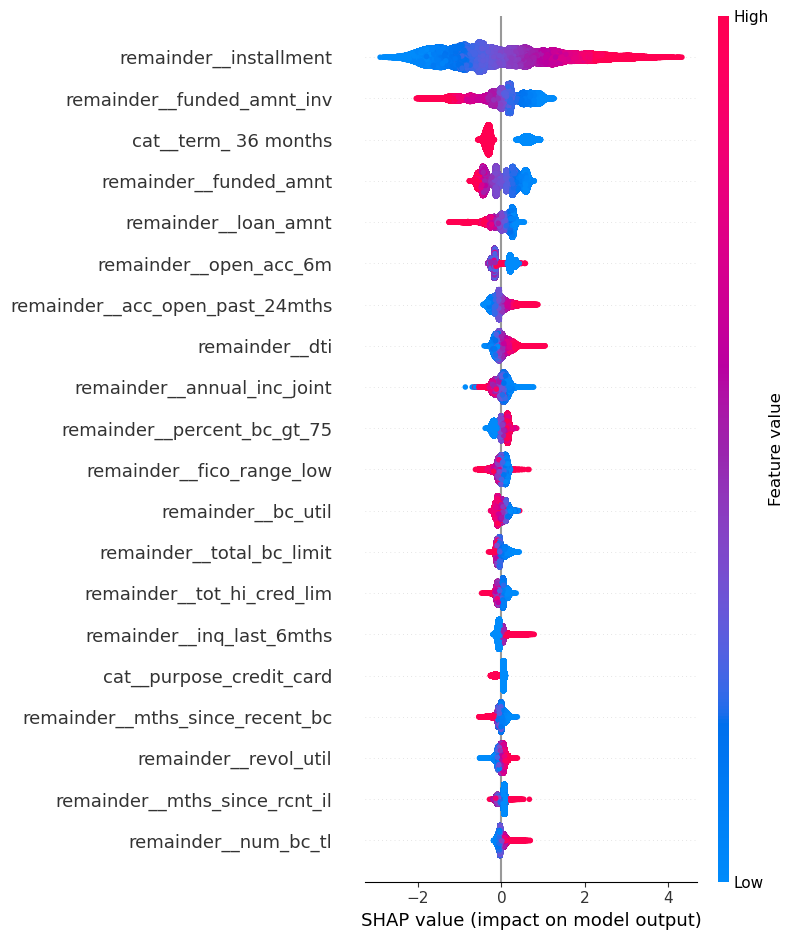

In [ ]:
shap.summary_plot(shap_values,                       # The Shapley values.
                  data, # The training sample
                      show=False)                        # Whether to print the model or not

# Let's save this as a PDF for later use.
plt.savefig('ShapSummaryPlot.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
shap.dependence_plot("remainder__Employ",                          # The variable to study
                     shap_values,                       # The Shapley values.
                     data, # The training sample
                     show=False)                        # Whether to print the model or not

plt.savefig('ShapEmploy.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Compare Models

In [ ]:
with open('model/logistic_regression.pkl', 'rb') as fp:
    logreg = pickle.load(fp)

In [ ]:
drop_columns = ['mo_sin_rcnt_rev_tl_op_woe', 'revol_util_woe', 'num_actv_rev_tl_woe']
test_WoE.drop(drop_columns, axis = 1).iloc[:, :-2]

,open_rv_24m_woe,fico_range_high_woe,il_util_woe,bc_open_to_buy_woe,acc_open_past_24mths_woe,total_bc_limit_woe,inq_last_6mths_woe,percent_bc_gt_75_woe,term_woe,annual_inc_joint_woe,bc_util_woe,mo_sin_rcnt_tl_woe,tot_hi_cred_lim_woe,mths_since_recent_inq_woe,dti_woe,dti_joint_woe,mths_since_recent_bc_woe
2,-0.806664,-0.244885,-0.292167,-0.182224,0.073693,0.118798,-0.194133,-0.385164,-0.171890,-0.021537,-0.379422,-0.191330,-0.014914,-0.007374,-0.099850,0.036127,-0.124697
3,-0.453791,-0.005659,-0.292167,-0.182224,0.073693,-0.029656,-0.194133,-0.031422,-0.171890,0.219624,-0.145495,-0.191330,-0.156961,-0.116614,0.258690,0.036127,-0.258069
4,0.087015,-0.244885,-0.504617,-0.182224,0.300876,-0.029656,-0.194133,-0.131326,0.346018,-0.222067,-0.145495,0.267937,-0.397778,-0.249687,0.078632,0.036127,0.210419
7,0.087015,0.365921,-0.504617,0.278587,0.491737,0.247501,0.653914,0.093529,-0.171890,0.219624,-0.145495,0.267937,0.159910,0.305521,0.258690,0.036127,0.096137
9,-0.806664,0.365921,-0.116331,0.278587,-0.477709,0.247501,-0.194133,0.245127,-0.171890,-0.021537,0.458701,-0.493779,0.159910,-0.249687,-0.099850,0.036127,-0.258069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280629,-0.207519,-0.838369,-0.292167,-0.931500,0.073693,-0.624899,0.374147,-0.385164,0.346018,-0.222067,-0.379422,0.025262,-0.647076,0.080744,-0.225954,0.036127,0.210419
1280633,-0.207519,-0.244885,-0.116331,-0.931500,0.300876,-0.624899,0.374147,-0.385164,0.346018,-0.501139,-0.379422,0.173173,-0.647076,0.165724,-0.225954,0.036127,0.002806
1280635,-0.806664,-0.005659,-0.292167,0.057663,-0.166381,-0.207859,0.139394,0.245127,0.346018,-0.222067,0.146015,0.173173,0.159910,0.165724,0.258690,0.036127,-0.258069
1280638,-0.806664,-0.506868,0.305061,-0.638783,-0.477709,-0.624899,-0.194133,0.245127,0.346018,-0.501139,0.048339,-0.191330,-0.287325,-0.249687,-0.099850,0.036127,-0.469696


In [ ]:
# Predict probabilities of scorecard.
logreg_probs_test = logreg.predict_proba(test_WoE.drop(drop_columns, axis = 1).iloc[:, :-2])

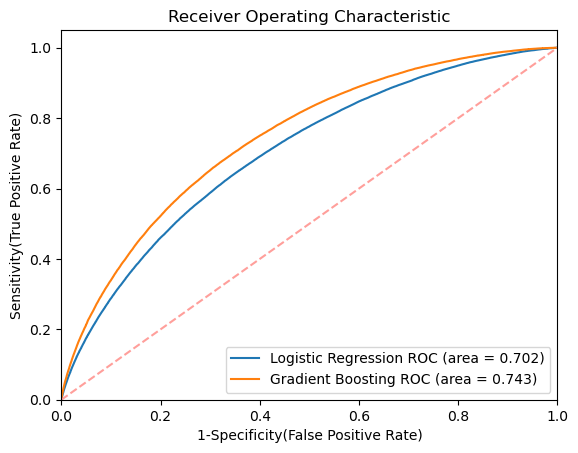

In [ ]:
# Set models and probabilities. This structure is called a dictionary.
models = [
{
    'label': 'Logistic Regression',
    'probs': logreg_probs_test[:,1]
},
{
    'label': 'Gradient Boosting',
    'probs': xg_probs_test
}]


# Loop that creates the plot. I will pass each ROC curve one by one.
for m in models:
    auc = roc_auc_score(y_true = test_noWoE['Default'], 
                             y_score = m['probs'])
    fpr, tpr, thresholds = roc_curve(test_WoE['Default'], 
                                           m['probs'])
    plt.plot(fpr, tpr, label=f'{m["label"]} ROC (area = {auc:.3f})')
                 

    
# Settings
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
    
# Plot!    
plt.show()